# Análise da Classificação por Categoria (ChatGPT)

Este notebook realiza a concatenação dos arquivos classificados por lotes, gera estatísticas exploratórias e visualizações da distribuição de categorias e vereditos, além de gráficos de tendência por ano.



Arquivo concatenado salvo em: C:\\Users\\vbitu\\projects\\fake-news-etl-project\\data\\interim\\dados_classificados_completos.csv
Total de títulos classificados: 4416
Categorias únicas: ['Economia e Crise Financeira' 'Personagens Públicos e Celebridades'
 'Outros / Não Classificado' 'Política e Eleições'
 'Segurança Pública e Violência' 'Conspirações Globais'
 'Religião e Profecias' 'Tecnologia e Redes Sociais' 'Saúde e Pandemias'
 'Meio Ambiente e Catástrofes' 'Grupos Sociais, Ideologia e Moral'
 'Grupos Sociais' 'Ciência e Pseudociência' 'Ideologia e Moral'
 'Esporte e Atletas']
                              Categoria  Quantidade
0                   Política e Eleições        2006
1                     Saúde e Pandemias         553
2         Segurança Pública e Violência         449
3   Personagens Públicos e Celebridades         376
4           Economia e Crise Financeira         347
5           Meio Ambiente e Catástrofes         214
6            Tecnologia e Redes Sociais         

C:\Users\vbitu\AppData\Local\Temp\ipykernel_17904\2211485853.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantidade', y='Categoria', data=contagem, palette='viridis')


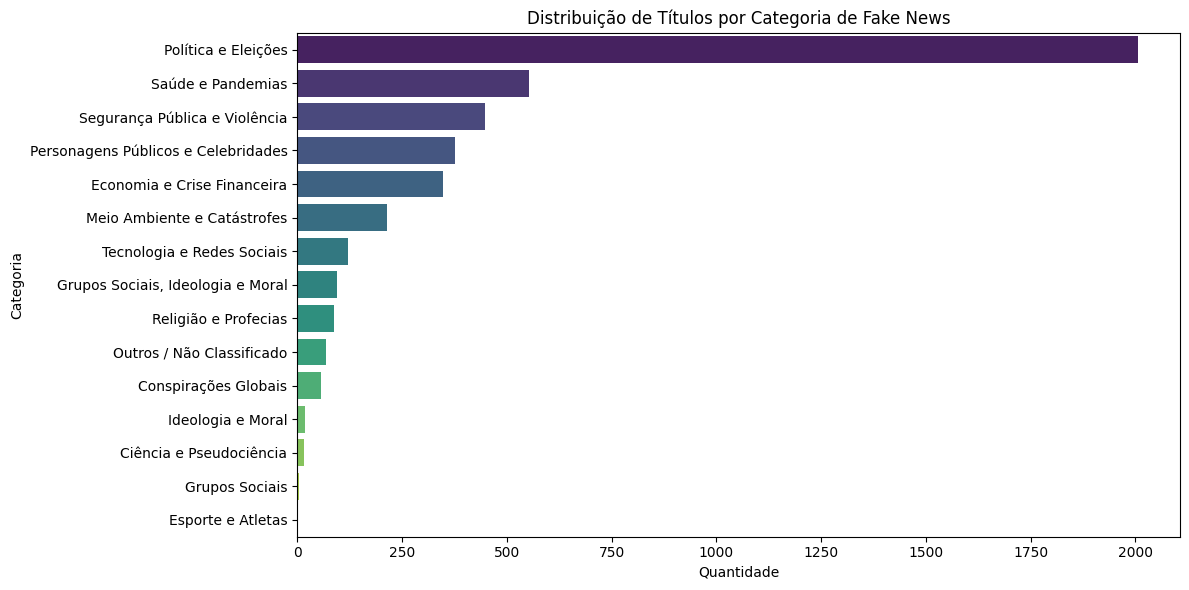

Colunas disponíveis: ['link', 'titulo', 'veredito', 'tags', 'data_publicacao', 'conteudo_completo', 'categoria_chatgpt']
Nenhuma coluna de data encontrada para extrair ano.


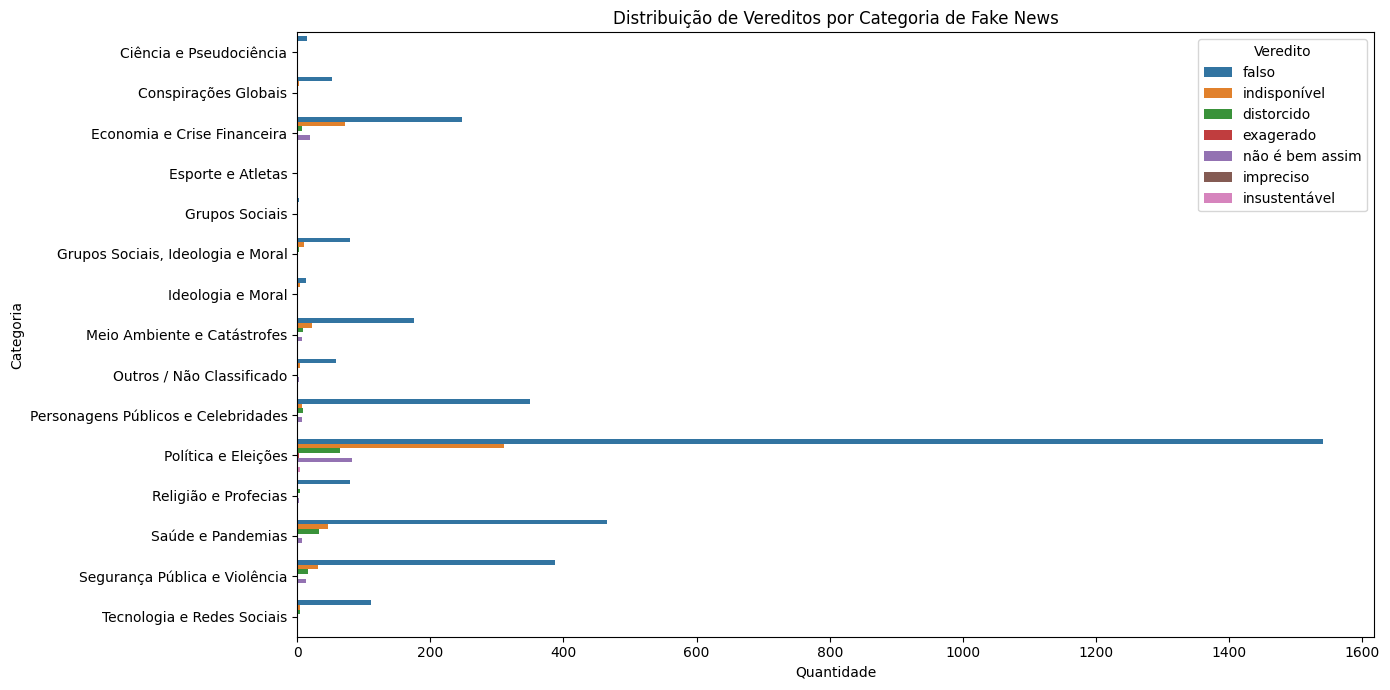

In [ ]:
# 08_analise_classificacao_chatgpt.ipynb

# ------------------------------
# 1. Importação de bibliotecas
# ------------------------------
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 2. Carregamento e concatenação dos arquivos classificados
# ------------------------------
pasta_dados = os.path.join("data", "processed")
arquivos = [
    "dados_classificados_chatgpt_0_100.csv",
    "dados_classificados_chatgpt_101_2500.csv",
    "dados_classificados_chatgpt_2501_4419.csv"
]

# Lê e concatena
dfs = [pd.read_csv(os.path.join(pasta_dados, f)) for f in arquivos]
df_total = pd.concat(dfs, ignore_index=True)

# Salva versão unificada
caminho_saida = os.path.join("data", "interim", "dados_classificados_completos.csv")
df_total.to_csv(caminho_saida, index=False)
print("Arquivo concatenado salvo em:", caminho_saida)

# ------------------------------
# 3. Estatísticas iniciais da classificação
# ------------------------------
print("Total de títulos classificados:", len(df_total))
print("Categorias únicas:", df_total['categoria_chatgpt'].unique())

# Contagem por categoria
contagem = df_total['categoria_chatgpt'].value_counts().reset_index()
contagem.columns = ['Categoria', 'Quantidade']
print(contagem)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantidade', y='Categoria', data=contagem, palette='viridis')
plt.title("Distribuição de Títulos por Categoria de Fake News")
plt.xlabel("Quantidade")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Evolução das categorias por ano
# ------------------------------
df_final = pd.read_csv(caminho_saida)
possiveis_nomes = ['data', 'Data', 'DATA', 'Data_publicacao']
coluna_data = next((col for col in possiveis_nomes if col in df_final.columns), None)

if coluna_data:
    df_final['ano'] = pd.to_datetime(df_final[coluna_data], errors='coerce').dt.year
    df_ano = df_final.groupby(['ano', 'categoria_chatgpt']).size().reset_index(name='quantidade')

    categorias = df_final['categoria_chatgpt'].unique()
    fig, axes = plt.subplots(nrows=(len(categorias) + 1) // 2, ncols=2, figsize=(14, len(categorias) * 2.5))
    axes = axes.flatten()

    for i, cat in enumerate(categorias):
        dados = df_ano[df_ano['categoria_chatgpt'] == cat]
        sns.lineplot(data=dados, x='ano', y='quantidade', marker='o', ax=axes[i])
        axes[i].set_title(cat)
        axes[i].set_ylabel("Quantidade")
        axes[i].set_xlabel("Ano")

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma coluna de data encontrada para extrair ano.")

# ------------------------------
# 5. Distribuição de vereditos por categoria
# ------------------------------
coluna_veredito = next((col for col in ['veredito', 'Veredito', 'VEREDITO'] if col in df_final.columns), None)

if coluna_veredito:
    df_veredito = df_final.groupby(['categoria_chatgpt', coluna_veredito]).size().reset_index(name='quantidade')

    plt.figure(figsize=(14, 7))
    sns.barplot(data=df_veredito, x='quantidade', y='categoria_chatgpt', hue=coluna_veredito)
    plt.title("Distribuição de Vereditos por Categoria de Fake News")
    plt.xlabel("Quantidade")
    plt.ylabel("Categoria")
    plt.legend(title='Veredito')
    plt.tight_layout()
    plt.show()
else:
    print("Coluna de veredito não encontrada no dataset.")
